## Cleaning Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Number of NA values in related to each stock:
StockId
147         0
452       104
607         0
2582        0
11646       0
         ... 
357811    286
358368    289
358371    289
358376    289
358379    289
Length: 155, dtype: int64

8.711842390127734% of the data contains NA values


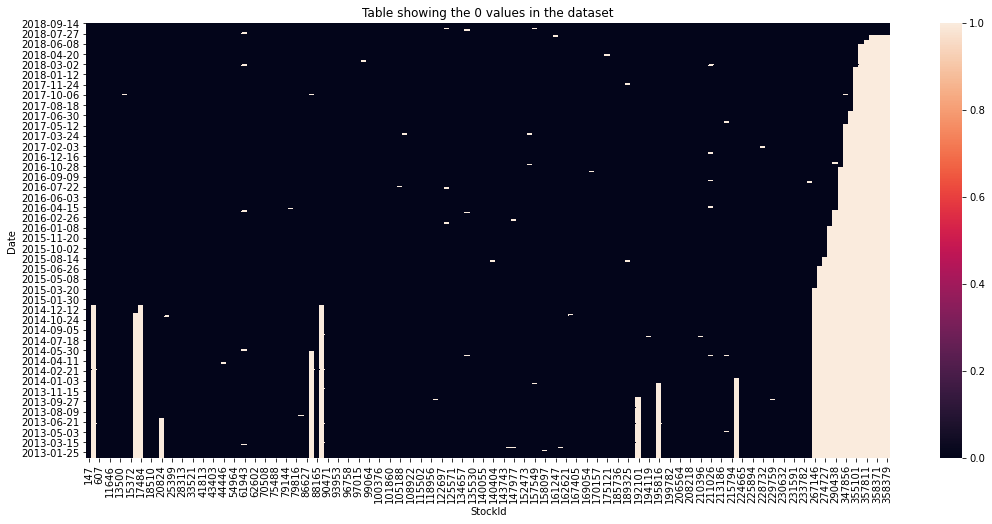

In [4]:
df = pd.read_csv("OrbQuantData.csv")

def cleanTheData(df):
    # function checks for NA values and replaces them with 0s 
    # returns the cleanedData
    
    
    # reshape the data from lonng format to wide - https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
    fullTable = df.pivot(index ="Date", columns ="StockId", values = "Value")

    # check NA values
    naTable = fullTable.isnull().sum()
    pctNas = 100* fullTable.isnull().sum().sum()/ (fullTable.shape[0]*fullTable.shape[1])

    print('Number of NA values in related to each stock:')
    print(naTable)
    print('\n{0}% of the data contains NA values'.format(pctNas))
    
    fullTable = fullTable.fillna(0)
    fullTable = fullTable.iloc[::-1]      # reverse table so dates in descending order
    
    # Plot graph
    f, ax = plt.subplots(figsize=(18, 8))
    sns.heatmap(fullTable == 0)
    ax.set_title('Table showing the 0 values in the dataset')
    plt.show()
        
    return fullTable

fullTable = cleanTheData(df)

# QS 1: 5yr data set

In [3]:
# 5 year data set consists of 52*5 = 260 weeks
fiveYrReturns = fullTable.iloc[0:52*5,:]

def computeCumulativeReturns(df):
    # this method computes the cumulative returns each of the stocks and prints the best
    # worst performers
    
    # Add 1 to each weekly return and compute the product of all the returns of each stock
    #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.product.html
    cumuReturns = df.add(1).product(axis = 0)     
    
    # sort cumulative returns
    cumuReturns.sort_values(ascending = False)
    
    print('Best performing Stock ID: {0} \n Return multiple: {1}'.format(cumuReturns.idxmax(), cumuReturns.max()))

    print('\nWorst performing Stock ID: {0} \n Return multiple: {1}'.format(cumuReturns.idxmin(), cumuReturns.min()))


computeCumulativeReturns(fiveYrReturns)

Best performing Stock ID: 206469 
 Return multiple: 3.711696288149029

Worst performing Stock ID: 100376 
 Return multiple: 0.003179589341807984


# QS 2a
### Part i) Stock 210449

In [4]:
# 3 year data set consists of 52*3 = 156 weeks

lastThreeYearsReturns = fullTable.iloc[0:52*3,:]


In [5]:

def computeCorrelations(df):
    # This method computes the correlations across the data set, removes rows and 
    # columns that are entirely populated with NA values
    # from the correlation matrix and then returns the result
    
    ## drop columns and rows containing only NA values
    correlDroppedNas = df.corr().dropna(axis = 0, how='all')
    correlDroppedNas = correlDroppedNas.dropna(axis = 1, how='all')
    
    return correlDroppedNas

In [6]:
def getTopCorrelationsOfStockOfInterest(df, StockId):
    # this method takes the correlations table, stock ID of interest and number of
    # most correlated stocks one wants to view as inputs
    # it prints a bar chart of correlated stocks
    # and outputs the raw tabular data
    
    # sort values and remove first element, which is necessarily the StockId 
    #(which will always have correlation of 1) 
    correlationsSet = df[StockId].sort_values(ascending = False)[1:]

    f, ax = plt.subplots(figsize=(8, 8))
    sns.barplot(x = correlationsSet.head(10).index, y = correlationsSet.head(10))
    ax.set_title('Top 10 stocks most correlated to {0}'.format(StockId))

    plt.show()
    
    print('Top 10 stocks most correlated to {0}'.format(StockId))
    print(correlationsSet.head(10))
    
    print('\n Stocks most correlated to {0} by StockID'.format(StockId))
    print(list(correlationsSet.head(10).index.values))
    return correlationsSet.head(10)

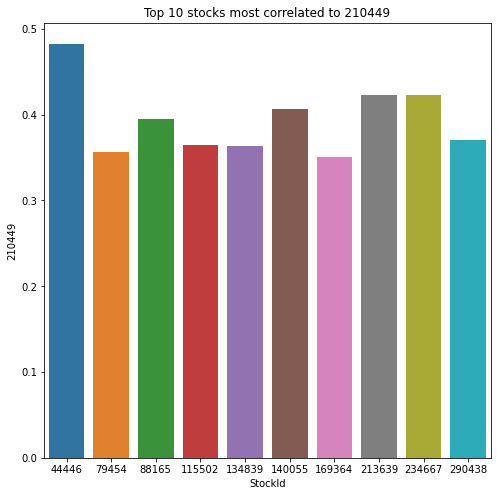

Top 10 stocks most correlated to 210449
StockId
44446     0.482828
213639    0.423521
234667    0.422793
140055    0.406538
88165     0.395443
290438    0.370108
115502    0.364522
134839    0.363199
79454     0.356205
169364    0.350195
Name: 210449, dtype: float64

 Stocks most correlated to 210449 by StockID
[44446, 213639, 234667, 140055, 88165, 290438, 115502, 134839, 79454, 169364]


In [119]:
lastThreeYearsCorrelations = computeCorrelations(lastThreeYearsReturns)

correlatedSet210449 = getTopCorrelationsOfStockOfInterest(lastThreeYearsCorrelations, 210449)


## Part ii) Stock 96775


In [120]:
# 3 yrs ending 01-03-2017
# 3 yrs == 3*52 = 156 wks

threeYrsEndingMarch17 = fullTable.iloc[fullTable.index <= '2017-03-01',:]
threeYrsEndingMarch17 = threeYrsEndingMarch17.head(156)


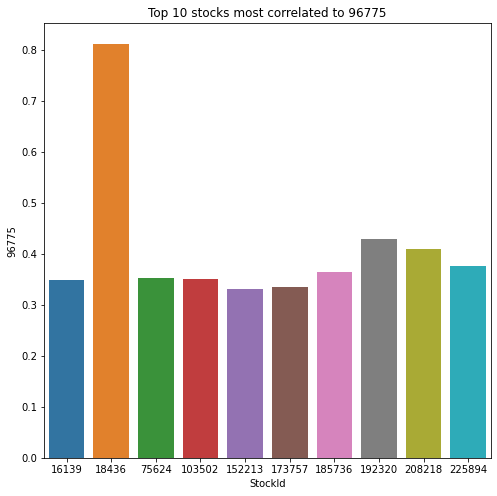

Top 10 stocks most correlated to 96775
StockId
18436     0.812427
192320    0.429964
208218    0.410276
225894    0.376059
185736    0.364736
75624     0.352845
103502    0.350985
16139     0.349340
173757    0.334303
152213    0.331907
Name: 96775, dtype: float64

 Stocks most correlated to 96775 by StockID
[18436, 192320, 208218, 225894, 185736, 75624, 103502, 16139, 173757, 152213]


In [121]:
threeYearsEnding2017Correlations = computeCorrelations(lastThreeYearsReturns)

correlatedSet96775 = getTopCorrelationsOfStockOfInterest(threeYearsEnding2017Correlations, 96775)

# Qs 2b

Inspecting the graphs visually, we can see that Stock 210449's group of correlated stocks appears to be more homogeneous than Stock 96775's.

- We compute 1/(variance of correlations) as our dispersion measure to quantify the degree of homogeneity

In [150]:
if  1/correlatedSet210449.var() == 1/correlatedSet96775.var():
    print('Same degree of homogeneity across both sets of correlated stocks')
elif 1/correlatedSet210449.var() < 1/correlatedSet96775.var():
    print('Variance score implies Stock 96775s set of correlated stocks is more homoegenous')
    print('\nHomogeneity scores\n')
    print('210449: ' + str(1/correlatedSet210449.var()))
    print('96775: ' + str(1/correlatedSet96775.var()))
else:
    print('Homogeneity score implies Stock 210449s set of correlated stocks is more homoegenous')
    print('\nHomogeneity scores\n')
    print('210449: ' + str(1/correlatedSet210449.var()))
    print('96775: ' + str(1/correlatedSet96775.var()))



Homogeneity score implies Stock 210449s set of correlated stocks is more homoegenous

Homogeneity scores

210449: 581.2497849738794
96775: 47.92632551451869
